In [9]:
from collections import deque

class MazeGame:
    def __init__(self, maze):
        self.maze = maze
        self.rows = len(maze)
        self.cols = len(maze[0])

    def is_valid_move(self, x, y):
        return 0 <= x < self.rows and 0 <= y < self.cols and self.maze[x][y] == 1

    def bfs(self, start, end):
        directions = [(1, 0), (-1, 0), (0, 1), (0, -1)]  # right, left, down, up
        visited = set()
        queue = deque([(start, 0)])

        while queue:
            (x, y), steps = queue.popleft()
            if (x, y) == end:
                return steps
            visited.add((x, y))
            for dx, dy in directions:
                new_x, new_y = x + dx, y + dy
                if self.is_valid_move(new_x, new_y) and (new_x, new_y) not in visited:
                    queue.append(((new_x, new_y), steps + 1))
                    visited.add((new_x, new_y))
        return -1

def main():
    maze = [
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0],
        [0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0],
        [0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0],
        [0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1],
        [0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0],
        [0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0],
        [0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0],
        [0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0],
        [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0],
        [1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
    ]

    game = MazeGame(maze)
    start = (4, 11)
    end = (10, 0)
    shortest_path_length = game.bfs(start, end)
    if shortest_path_length != -1:
        print("Shortest path length using BFS:", shortest_path_length)
    else:
        print("No path found")

if __name__ == "__main__":
    main()

Shortest path length using BFS: 29


main start

Algorithm used = BFS
Path found!!
Total nodes visited =  55
Shortest path steps =  29

Algorithm used = DFS
Path found!!
Total nodes visited =  54
Steps with backtracking =  29


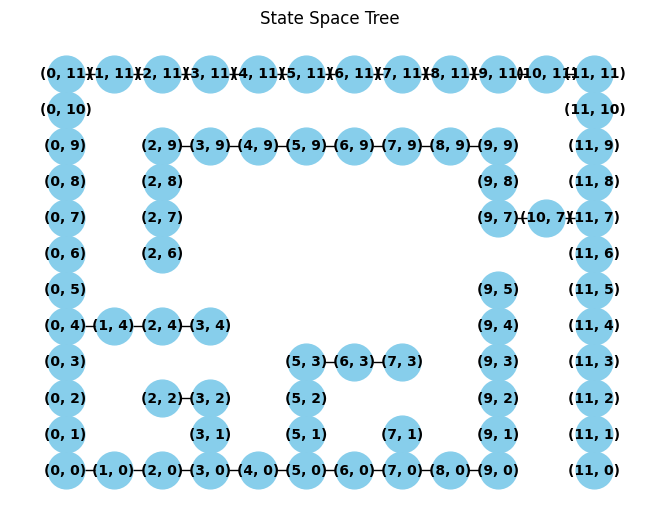

In [10]:
import networkx as nx
import matplotlib.pyplot as plt
from collections import deque

# maze = [
#     [0, 1, 0, 0, 0],
#     [0, 1, 0, 1, 0],
#     [0, 0, 0, 0, 0],
#     [0, 1, 1, 1, 0],
#     [0, 0, 0, 0, 0]
# ]

maze=[
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0],
        [0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0],
        [0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0],
        [0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1],
        [0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0],
        [0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0],
        [0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0],
        [0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0],
        [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0],
        [1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
    ]

def is_valid_move(x, y):
    return 0 <= x < len(maze) and 0 <= y < len(maze[0]) and maze[x][y] == 0

def construct_state_space_tree(maze, start):
    G = nx.Graph()
    queue = deque([start])
    G.add_node(start)

    while queue:
        x, y = queue.popleft()
        for dx, dy in [(1, 0), (-1, 0), (0, 1), (0, -1)]:
            new_x, new_y = x + dx, y + dy
            if is_valid_move(new_x, new_y) and (new_x, new_y) not in G.nodes():
                G.add_node((new_x, new_y))
                G.add_edge((x, y), (new_x, new_y))
                queue.append((new_x, new_y))
    return G

# start = (1,1)
start=(4, 11)
G = construct_state_space_tree(maze, start)

# Plotting the state space tree
pos = {node: node for node in G.nodes()}
nx.draw(G, pos, with_labels=True, node_size=700, node_color="skyblue", font_size=10, font_weight="bold", font_color="black")
plt.title("State Space Tree")
plt.show()